In [1]:
import os
from tensorflow import keras
import tensorflow as tf
from keras.layers import Conv2D, Dense, Flatten , Input, MaxPooling2D
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras import Sequential
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import pathlib
import shutil

Get train, test, val path

In [2]:
TRAIN_PATH = r"C:\Users\ibrah\Downloads\Compressed\archive_5\Training\Training"
TEST_PATH = r"C:\Users\ibrah\Downloads\Compressed\archive_5\Testing\Testing"
VALIDATION_PATH =r"C:\Users\ibrah\Downloads\Compressed\archive_5\Validation\Validation"

In [3]:
folders = ['smoking_img','notsmoking_img']

for folder in folders:
    folder_path  = os.path.join(TRAIN_PATH,folder)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print('folder created')
    else:
        print('folder allready e')

folder allready e
folder allready e


In [4]:
for folder in folders:
    folder_path  = os.path.join(VALIDATION_PATH,folder)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print('folder created')
    else:
        print('folder allready e')

folder allready e
folder allready e


In [5]:
for folder in folders:
    folder_path  = os.path.join(TEST_PATH,folder)

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
        print('folder created')
    else:
        print('folder allready e')

folder allready e
folder allready e


In [6]:
filemanes_train = os.listdir(TRAIN_PATH)
filemanes_test = os.listdir(TEST_PATH)
filenames_val = os.listdir(VALIDATION_PATH)
smokig_path_train = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Training\Training\smoking_img'
notsmoking_path_train = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Training\Training\notsmoking_img'
smoking_path_val = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Validation\Validation\smoking_img'
notsmoking_path_val = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Validation\Validation\notsmoking_img'
smoking_path_test = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Testing\Testing\smoking_img'
notsmoking_path_test = r'C:\Users\ibrah\Downloads\Compressed\archive_5\Testing\Testing\notsmoking_img'

In [7]:
for filename in filemanes_train:
    source = os.path.join(TRAIN_PATH,filename)
    if source.endswith('jpg'):
        if 'notsmoking' in filename:
            shutil.move(source, notsmoking_path_train)
        else:
            shutil.move(source, smokig_path_train)
for filename in filemanes_test:
    source = os.path.join(TEST_PATH,filename)
    if source.endswith('jpg'):
        if 'notsmoking' in filename:
            shutil.move(source, notsmoking_path_test)
        else:
            shutil.move(source, smoking_path_test)
for filename in filenames_val:
    source = os.path.join(VALIDATION_PATH,filename)
    if source.endswith('jpg'):
        if 'notsmoking' in filename:
            shutil.move(source, notsmoking_path_val)
        else:
            shutil.move(source, smoking_path_val)


In [8]:
dataset_train =keras.preprocessing.image_dataset_from_directory(TRAIN_PATH)
dataset_test =keras.preprocessing.image_dataset_from_directory(TEST_PATH)
dataset_val =keras.preprocessing.image_dataset_from_directory(VALIDATION_PATH)

Found 716 files belonging to 2 classes.
Found 224 files belonging to 2 classes.
Found 180 files belonging to 2 classes.


In [9]:
def preprocessing_path(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img,channels=3)
    label = tf.strings.split(file_path,'\\')[-1]
    label = tf.strings.to_number(label,out_type=tf.int64)

    return img,label

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy','MSE'])

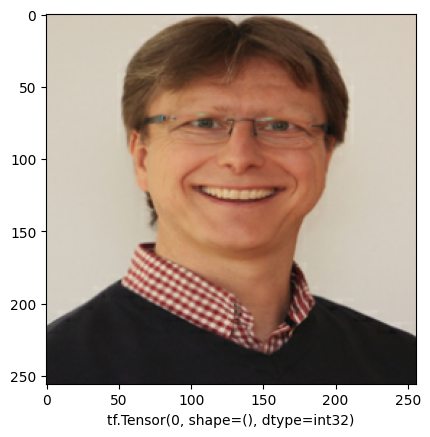

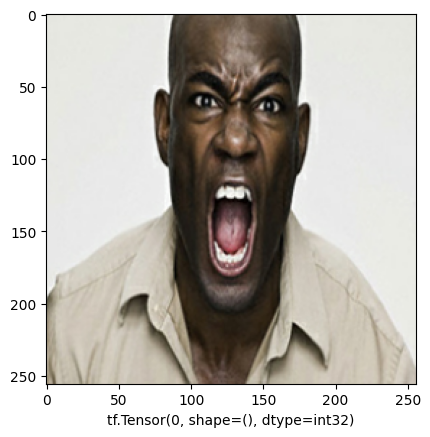

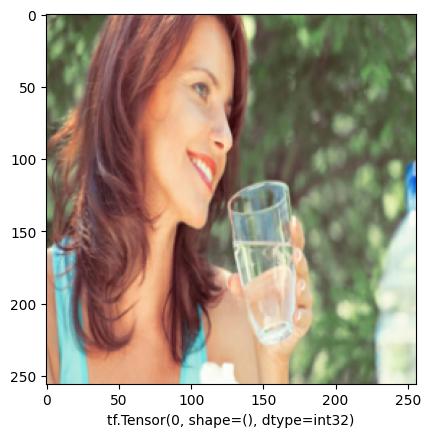

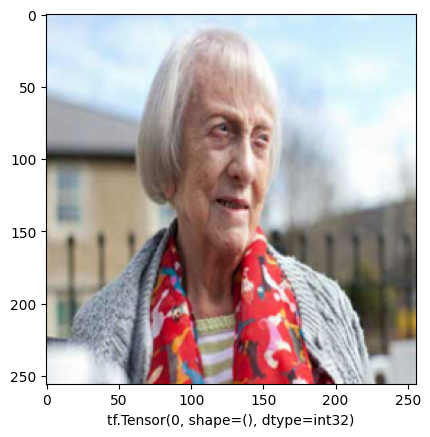

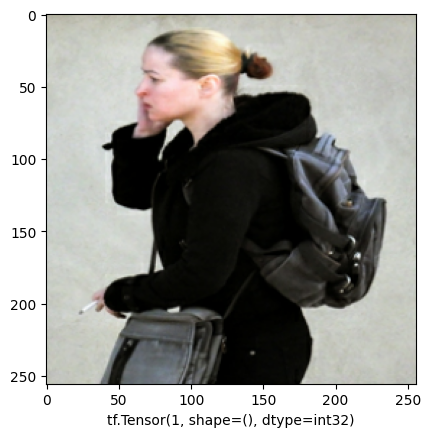

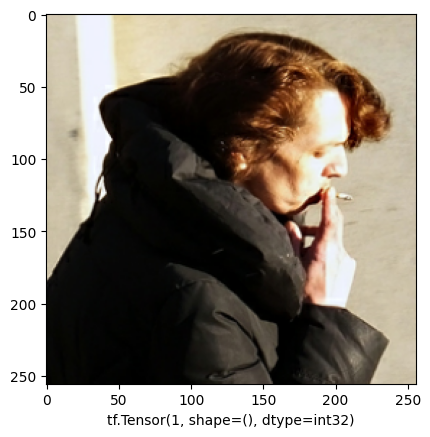

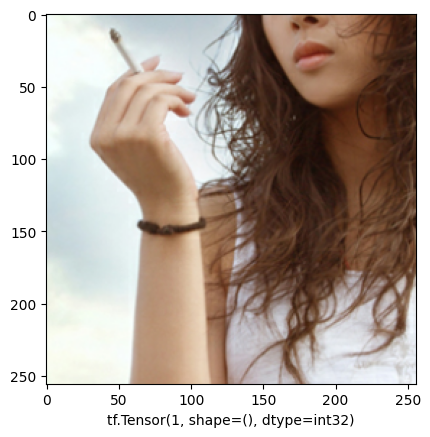

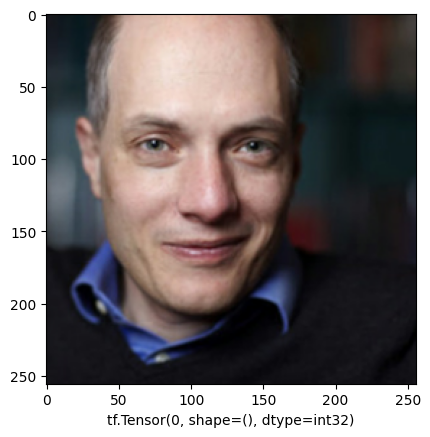

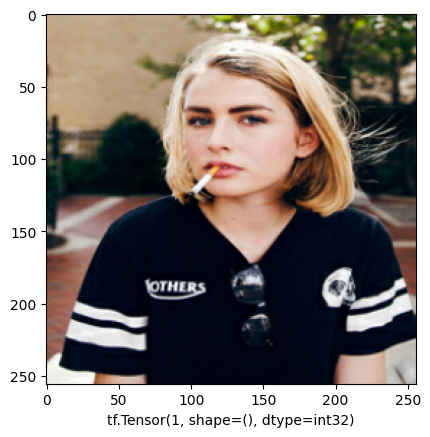

In [12]:
for image,label in dataset_train.take(1):
    for i in range(1,10):
        plt.imshow(image[i].numpy().astype('uint32'))
        plt.xlabel(label[i])
        plt.show()

In [19]:
model.fit(dataset_train,epochs=10,validation_data=dataset_val,batch_size=20,validation_batch_size=20)

Epoch 1/10


23/23 [==============================] - 10s 269ms/step - loss: nan - accuracy: 0.5000 - MSE: nan - val_loss: nan - val_accuracy: 0.5000 - val_MSE: nan
Epoch 2/10
23/23 [==============================] - 4s 152ms/step - loss: nan - accuracy: 0.5000 - MSE: nan - val_loss: nan - val_accuracy: 0.5000 - val_MSE: nan
Epoch 3/10
23/23 [==============================] - 4s 151ms/step - loss: nan - accuracy: 0.5000 - MSE: nan - val_loss: nan - val_accuracy: 0.5000 - val_MSE: nan
Epoch 4/10
23/23 [==============================] - ETA: 0s - loss: nan - accuracy: 0.5000 - MSE: nan

KeyboardInterrupt: 